<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/01_Basic/05_ClusteringExtractingPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering: Extracting patterns from our data

In this course, we will learn how to use clustering to extract patterns in our data. 

In our job, it is common that we want to make classifications, to get, for instance, whether someone will not pay their debt. For that end, one may use supervised learning techniques. In other cases, however, one may want to simply understand the behavior of each customer, and segmentate then in different groups. Here, we do not have a label (unsupervised learning), but rather we simply want to group similar customers.

In this course, we will use the following packages:

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import Normalizer

from sklearn.cluster import KMeans

from sklearn import metrics

In this course, we will use the following dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


This dataset was taken from Kaggle, and has information about almost 9000 customers and how they use their credit cards. Let's see the features in our dataset:

In [4]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

So, our dataset has 18 features, such as:

* Customer ID;
* Balance;
* Frequency that this balancy is changed;
* One-off purchases;
* Payments;
* Price of the full payment;
* Minimum payment;
* Credit limit;
* And others.

We have many features, and some of those may not be helpful for our clustering. So, let's clean our dataset:

* First, the customer ID should not have any importance in our clusters. 
* Also, Tenure is related to the "contract" time to be renewed. 

Let's remove those two features:





In [5]:
df.drop(['CUST_ID', 'TENURE'], axis = 1, inplace = True)
df.head( )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


Now, let's see if we have any missing data:

In [6]:
df.isna( ).sum( )

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

So, we have one entry missing for feature ```CREDIT_LIMIT``` and 313 entries missing for feature ```MINIMUM_PAYMENTS```. So, we have to either remove those entries, or use an approach to fill those missing values. Since 313 is a relatively high amount of data points (almost 5% of our entries), we will try to fill those values with the median of the feature.

In [7]:
df.fillna(df.median( ), inplace = True)

In [8]:
df.isna( ).sum( )

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Nice! Now, we have no null values. 

Finally, when we cluster our data using multiple features, we should normalize our data, so that no feature ends up being more important than the other. We can normalize our data using:

In [9]:
normalizer = Normalizer( )
df_n = normalizer.fit_transform(df)

df_n = pd.DataFrame(df_n, columns = df.columns)

In [10]:
df_n.describe( )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.245525,0.000246,0.152657,0.078253,0.074494,0.138819,0.000132,0.000039,0.000102,0.000030,0.000625,0.002816,0.743808,0.257959,0.132307,0.000044
std,0.218888,0.000216,0.164944,0.125214,0.109866,0.203105,0.000170,0.000068,0.000161,0.000057,0.001257,0.003658,0.202171,0.198470,0.154247,0.000113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005261,0.000000,0.000009,0.000000
25%,0.033441,0.000100,0.008518,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000153,0.624735,0.109536,0.040319,0.000000
50%,0.202915,0.000176,0.095271,0.006962,0.017960,0.000000,0.000077,0.000008,0.000031,0.000000,0.000000,0.001581,0.752792,0.192977,0.086190,0.000000
75%,0.430584,0.000330,0.249526,0.112331,0.113628,0.243806,0.000177,0.000054,0.000134,0.000041,0.000771,0.004118,0.927302,0.372949,0.159889,0.000030
max,0.762193,0.002917,0.705478,0.637729,0.584347,0.812682,0.001375,0.000860,0.001146,0.000912,0.022500,0.063149,1.000000,0.977965,0.994341,0.002063


# Performing our first clustering using K-means

Finally, we will cluster our data using the most popular algorithm: K-means. 

In [11]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(df_n)

Note that, here, we considered 5 clusters. We can see our clusters using:

In [12]:
y_pred

array([1, 0, 1, ..., 1, 1, 4], dtype=int32)

Also, we can add this as a feature in our dataframe:

In [13]:
df_aux = df_n.copy( )
df_aux['Cluster_KMeans'] = y_pred

In [14]:
df_aux.head( )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster_KMeans
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.00000,1
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.00002,0
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.00000,1
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.00000,1
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.00000,2


# Validating our clusters

So, how do we validate our clusters? How do we know if our clusters make sense? Here, we will use some internal metrics.

Are the points in our clusters close to each other? If so, our clusters do make sense, as they are more compact.

Also, are the different cluster distant from each other? Are the different clusters really **that** different? If so, our clusters do make sense.

In the following, we will use three different validation metrics, and see how they allow us to see if our clusters make sense.

## Silhoutte coefficient

The silhoutte coefficient has a very simple equation:

\begin{equation}
s_i = \dfrac{b - a}{\max{(b, a)}}
\end{equation}

where $a$ is the average distance between point $i$ and the other points in the same cluster (measures how compact our cluster is), and $b$ is the average distance between point $i$ and all other points in the closest cluster. The silhoutte coefficient for a given clustering method is the mean of the silhoutte coefficient for all points. 

The silhoutte coefficient is always in the domain $[-1, 1]$, and we consider that, if the silhoutte coefficient is positive, our clusters do make sense. The higher the silhotte coefficient, the better.

Thus, let's evaluate the K-Means clustering using this approach:

In [15]:
labels = kmeans.labels_
s = metrics.silhouette_score(df_n, labels, metric = 'euclidean')

In [16]:
s

0.3646017628085195

So, here, our silhoutte score was positive, being equal to $\approx 0.36$. Nice!

## Davies-Bouldin method

Another method for evaluating clustering approaches is the Davies-Bouldin method. Its equation is given by:

\begin{equation}
DB = \dfrac{1}{k} \, \sum_{i = 1}^k \max_{i \neq j} R_{ij}
\end{equation}

where $k$ is the number of clusters and

\begin{equation}
R_{ij} = \dfrac{s_i + s_j}{d_{ij}}
\end{equation}

where $s_i$ is the average distance from points in cluster $i$ and the centroid of cluster $i$, and $d_{ij}$ is distance between centroids of clusters $i$ and $j$.

Note that $s$ measures how compact are the clusters, and $d$ measures how separated are the clusters. The lower the $s$, the better. The higher the $d$, the better. Thus, the lower the $R$, the better. Thus, the lower the $DB$ coefficient, the better.

Finally, let's evaluate this coefficient for our clusters:

In [17]:
dbs = metrics.davies_bouldin_score(df_n, labels)

In [18]:
dbs

1.0753510081923616

Here, our Davies-Bouldin score was $\approx 1.08$. Note that, here, the Davies-Bouldin score is higher than 0, but can go up to infinite. The higher the $DB$, the worst. To understand if this score is good, we should compare to other values of $DB$, which we will perform latter.

## Calinsky index

The Calinsky index, once again, takes into account the dispersion inside each cluster, and also between clusters. This is a more complex method, and its explanation can be found in:

https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/#:~:text=The%20Calinski-Harabasz%20index%20%28CH%29%20is%20one%20of%20the,clustering%20algorithm%20for%20a%20given%20number%20of%20clusters.

In [19]:
calinski = metrics.calinski_harabasz_score(df_n, labels)

In [20]:
calinski

3431.783254564093

The Calinski index is higher when clusters are dense and well-separated. Also, note that we have a very high value, which is also affected by the number of features in our dataset. To get a better sense if this is a good results, we should compare it to similar results, which we will perform later.

# Comparing metrics

To use our metrics, especially the Davies-Bouldin and Calinski coefficients, we can test different clustering approachs in the same data set. 

Since we will run the algorithm and evaluate these metrics multiple times, we will first create a function to get these:

In [26]:
def GetClusteringMetrics(model, df):
  labels = model.fit_predict(df)
  s   = metrics.silhouette_score(df, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(df, labels)
  chs = metrics.calinski_harabasz_score(df, labels)

  return (s, dbs, chs)

Now, let's call this new function for a different number of clusters:

In [27]:
kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 300)

s, dbs, chs = GetClusteringMetrics(kmeans, df_n)

In [28]:
print("Silhouette: {:.2f}".format(s))
print("Davies-Bouldin: {:.2f}".format(dbs))
print("Calinsky: {:.2f}".format(chs))

Silhoette: 0.33
Davies-Bouldin: 1.31
Calinsky: 3526.44


So, when comparing to our previous number of clusters, we got:

* A lower silhouette coefficient (worse!);
* A higher Davies-Bouldin coefficient (worse!);
* A higher Calinsky (better!).



Before discussing those, let's evaluate the metrics for different number of clusters:

In [29]:
n_list   = []
s_list   = []
dbs_list = []
chs_list = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300)
  s, dbs, chs = GetClusteringMetrics(kmeans, df_n)
  
  n_list.append(k)
  s_list.append(s)
  dbs_list.append(dbs)
  chs_list.append(chs)

Now, let's plot those:

Text(0.5, 1.0, 'Silhouette')

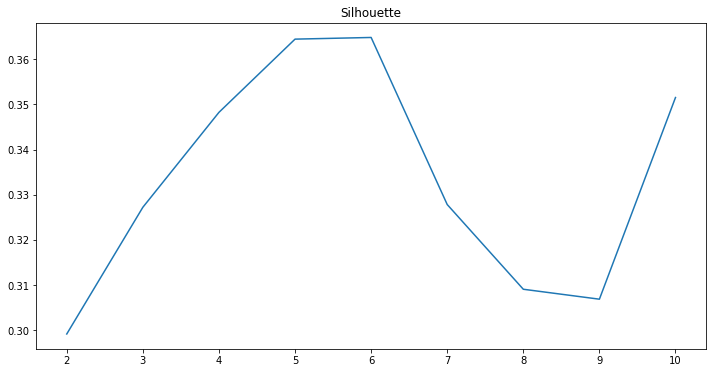

In [34]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = s_list)
plt.title('Silhouette')

So, the highest silhouette score was found with $k = 6$.

Text(0.5, 1.0, 'Davies-Bouldin')

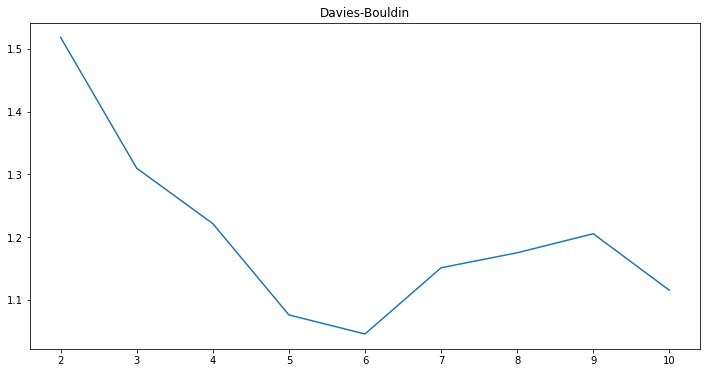

In [36]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = dbs_list)
plt.title('Davies-Bouldin')

The lowest Davies-Bouldin was also found with $k = 6$!

Text(0.5, 1.0, 'Calinski')

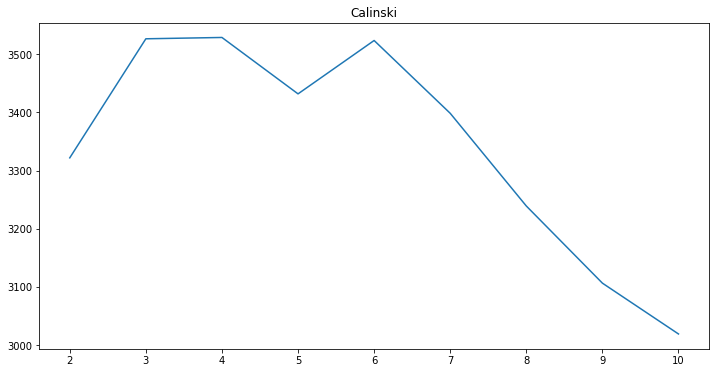

In [37]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = chs_list)
plt.title('Calinski')

The highest Calinski was found for $k = 4$ (3528.44), which was very close to the Calinski for $k = 6$ (3523.51)!

Here, we will choose $k = 6$ as the best configuration, as it presented the best silhouette and Davies-Bouldin, and almost the best Calinski. Also, note that the silhouette is, by far, the most popular method for choosing clustering algorithms.

For reference, our metrics for $k = 6$ are:

In [45]:
kmeans = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)

s, dbs, chs = GetClusteringMetrics(kmeans, df_n)

In [46]:
print("Silhouette: {:.2f}".format(s))
print("Davies-Bouldin: {:.2f}".format(dbs))
print("Calinsky: {:.2f}".format(chs))

Silhouette: 0.36
Davies-Bouldin: 1.05
Calinsky: 3523.52


## Evaluating a baseline metric value

We have performed a relative comparison between the metrics evaluated using the same dataset. However, we still have no information about how good is our clustering. For that end, we will try to evaluate baseline metrics using a random dataset. First, we will define a random dataset, which has the same number of entries and features as our initial dataset. Then, we will cluster this data, and get the metrics for this dataset. If our clustering was effective, our metrics will be better than those evaluated for the random dataset.

Let's start this procedure by creating a random dataset:

In [43]:
size_df = df_n.shape

In [44]:
random_data = np.random.rand(size_df[0], size_df[1])

Finally, let's run our clustering algorithm for this dataset:

In [47]:
n_list   = []
s_list   = []
dbs_list = []
chs_list = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300)
  s, dbs, chs = GetClusteringMetrics(kmeans, random_data)
  
  n_list.append(k)
  s_list.append(s)
  dbs_list.append(dbs)
  chs_list.append(chs)

Finally, let's get the number of clusters that obtains the best metrics:

Text(0.5, 1.0, 'Silhouette')

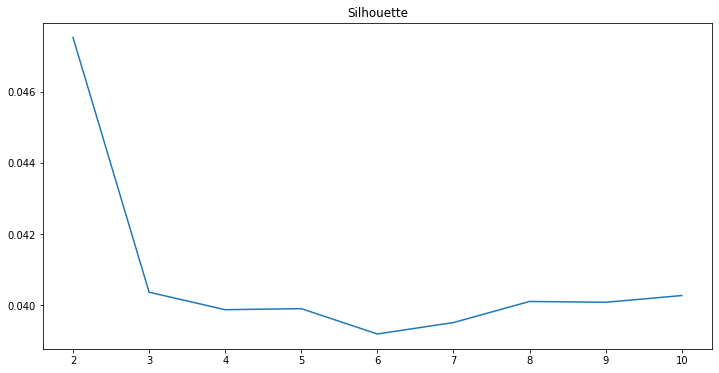

In [48]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = s_list)
plt.title('Silhouette')

Text(0.5, 1.0, 'Davies_Bouldin')

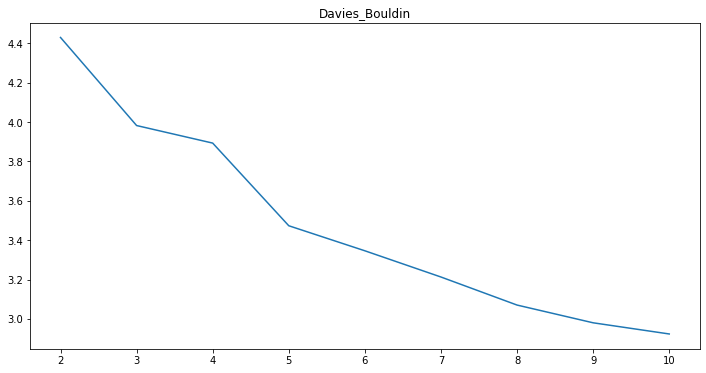

In [49]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = dbs_list)
plt.title('Davies_Bouldin')

Text(0.5, 1.0, 'Calinski')

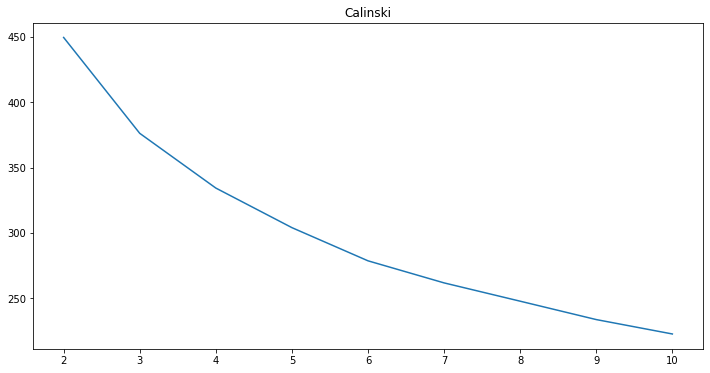

In [50]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_list, y = chs_list)
plt.title('Calinski')

So, here, we see that our metrics are much worse. Our best silhouette was found for $k = 2$, which was close to 0.048. Our best Davies-Bouldin was found for $k = 10$, which was close to 3.0. Finally, our best Calinski was also for $k = 2$, which was close to 450. Thus, the metrics for our initial dataset were, indeed, much better than those from a random dataset.

## Evaluating cluster stability

To evaluate cluster stability, we will check if, dividing our dataset, we still get similar metrics for all three splits. This is important to guarantee that our choice towards $k = 6$ was not based on "luck". Thus, let's split our data:

In [53]:
set_1, set_2, set_3 = np.array_split(df_n, 3)

Now, let's evaluate the metrics for each subset:

In [54]:
kmeans = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)

s, dbs, chs = GetClusteringMetrics(kmeans, set_1)

print("Silhouette: {:.2f}".format(s))
print("Davies-Bouldin: {:.2f}".format(dbs))
print("Calinsky: {:.2f}".format(chs))

Silhouette: 0.36
Davies-Bouldin: 1.02
Calinsky: 1192.36


In [55]:
kmeans = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)

s, dbs, chs = GetClusteringMetrics(kmeans, set_2)

print("Silhouette: {:.2f}".format(s))
print("Davies-Bouldin: {:.2f}".format(dbs))
print("Calinsky: {:.2f}".format(chs))

Silhouette: 0.36
Davies-Bouldin: 1.06
Calinsky: 1169.44


In [56]:
kmeans = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)

s, dbs, chs = GetClusteringMetrics(kmeans, set_3)

print("Silhouette: {:.2f}".format(s))
print("Davies-Bouldin: {:.2f}".format(dbs))
print("Calinsky: {:.2f}".format(chs))

Silhouette: 0.37
Davies-Bouldin: 1.04
Calinsky: 1184.79


We see that the silhouette changed very little, which was very close to the silhouette from the entire dataset. The Davies-Bouldin and the Calinski also changed very little. Note that the Calinski is very different from the Calinski found previously. That happens because the Calinski is highly influenced by the number of entries in our dataset.

# Visualizing our clusters

Now, we can try to visualize our clusters. First, let's create a new dataframe with information about our cluster labels:

In [60]:
kmeans = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)

labels = kmeans.fit_predict(df_n)

In [61]:
clustered_df = df.copy( )
clustered_df['Cluster'] = labels

Now, to visualize our clusters in a 2D plot, we have to choose to attributes from our data. Here, we will use PURCHASES and PAYMENTS:

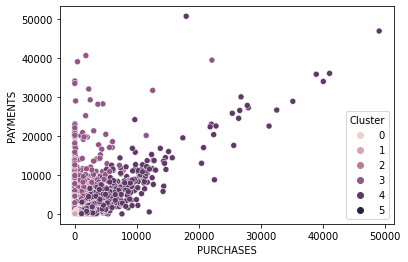

In [62]:
sns.scatterplot(x = 'PURCHASES', y = 'PAYMENTS', hue = 'Cluster', data = clustered_df)

Here, we can see that, on cluster 5, people tend to perform more purchases, and also more payments. On cluster 3, some people also perform more payments, but they tend to perform less purchases.

Note that it is not trivial to identify the separation of our dataset. This is because we got 2 features of our dataset to represent the entire dataset. Thus, indeed, it is not easy to identify the clusters.

We could also try to plot the scatterplot for all attributes, pair by pair. However, this would ended up in a lot of graphs, which would make it impossible for us to understand what is going on.

# Trying to understand our cluster by analyzing some metrics

Another approach we can do to understand our clusters is trying to evaluate some metrics for them. Thus, let's group our data by clusters, and get the mean for each attribute:

In [64]:
grouped_df = clustered_df.groupby('Cluster')

In [67]:
grouped_df.mean( )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,,,,,,,,,,,
0,2424.756155,0.891552,238.544315,145.039736,93.524104,3110.827020,0.207614,0.081503,0.134931,0.348217,8.893673,4.217926,4475.659051,976.016505,796.086809,0.008908
1,418.278213,0.774433,628.403946,311.861079,316.885483,119.297616,0.572560,0.186324,0.433541,0.029853,0.533375,11.992202,5130.114400,817.025480,220.813636,0.252404
2,3247.143325,0.998537,518.926591,308.374055,210.697959,767.895503,0.346599,0.154833,0.240772,0.185966,3.727475,9.743604,4421.774194,1051.691665,1150.573072,0.000097
3,1767.343917,0.856842,528.332615,315.888825,212.501726,3091.813329,0.285512,0.124842,0.198583,0.295548,8.605720,8.411645,3952.319931,5000.353036,747.424886,0.128703
4,1118.416028,0.929561,3328.473968,2166.636241,1162.475925,185.757811,0.813586,0.468874,0.607176,0.042554,0.876261,38.131809,4110.127876,3051.122230,537.754177,0.284099
5,1959.062058,0.987365,856.281725,151.850380,705.305000,451.824341,0.597199,0.070364,0.549823,0.089397,2.385965,17.397661,2198.684211,1339.886001,6865.322947,0.022729


Still, it is hard to understand our clusters here, as we have many attributes. Let's choose some attributes to make our analyzes.

But how can we get the most important features? For that end, we can use the centroids for each cluster:

In [70]:
centers = kmeans.cluster_centers_
centers

array([[3.70338745e-01, 2.30822307e-04, 4.12556566e-02, 2.38684139e-02,
        1.73919635e-02, 5.02023360e-01, 4.77866510e-05, 1.62688558e-05,
        3.15585334e-05, 8.06972033e-05, 1.82054568e-03, 8.05301686e-04,
        7.07792668e-01, 1.51266887e-01, 1.31376159e-01, 2.41841913e-06],
       [6.53496652e-02, 2.31606600e-04, 1.22118293e-01, 4.78853432e-02,
        7.43354597e-02, 1.97559090e-02, 1.74800577e-04, 3.38033340e-05,
        1.41916286e-04, 7.36879880e-06, 1.15330299e-04, 2.88981253e-03,
        9.45343347e-01, 1.54957003e-01, 5.58632630e-02, 7.78908425e-05],
       [5.61979125e-01, 3.00065888e-04, 8.34276862e-02, 4.71443751e-02,
        3.63210989e-02, 1.05733255e-01, 8.69111474e-05, 3.31389652e-05,
        6.01901225e-05, 4.31725962e-05, 7.57160933e-04, 1.84225396e-03,
        7.20503034e-01, 1.90917186e-01, 2.10485036e-01, 1.15759155e-07],
       [2.29347967e-01, 2.10550949e-04, 6.85201015e-02, 3.87709927e-02,
        2.97548246e-02, 3.65871393e-01, 5.84151126e-05, 2.266

To understand which are the most important features, we will try to evaluate which clusters present the greatest variation. For that end, we will use the variance. Thus, let's evaluate the variance for the centroid centers of each attribute:

In [80]:
_, n_attributes = df_n.shape

var_sr = pd.Series( )

for i in range(n_attributes):
  print(df_n.columns[i])
  var_att = centers[:, i].var( )
  print(var_att.round(4))
  var_sr.loc[df_n.columns[i]] = var_att
  print('----------------------------------')

BALANCE
0.0254
----------------------------------
BALANCE_FREQUENCY
0.0
----------------------------------
PURCHASES
0.0183
----------------------------------
ONEOFF_PURCHASES
0.007
----------------------------------
INSTALLMENTS_PURCHASES
0.0035
----------------------------------
CASH_ADVANCE
0.0346
----------------------------------
PURCHASES_FREQUENCY
0.0
----------------------------------
ONEOFF_PURCHASES_FREQUENCY
0.0
----------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY
0.0
----------------------------------
CASH_ADVANCE_FREQUENCY
0.0
----------------------------------
CASH_ADVANCE_TRX
0.0
----------------------------------
PURCHASES_TRX
0.0
----------------------------------
CREDIT_LIMIT
0.0348
----------------------------------
PAYMENTS
0.03
----------------------------------
MINIMUM_PAYMENTS
0.0539
----------------------------------
PRC_FULL_PAYMENT
0.0
----------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Nice! Now, let's get which attributes show the highest variance:

In [79]:
var_sr.sort_values(ascending = False)

MINIMUM_PAYMENTS                    5.387330e-02
CREDIT_LIMIT                        3.479949e-02
CASH_ADVANCE                        3.455819e-02
PAYMENTS                            2.999142e-02
BALANCE                             2.539626e-02
PURCHASES                           1.833350e-02
ONEOFF_PURCHASES                    7.020112e-03
INSTALLMENTS_PURCHASES              3.459986e-03
PURCHASES_TRX                       3.215750e-06
CASH_ADVANCE_TRX                    4.026996e-07
PURCHASES_FREQUENCY                 3.545502e-09
PURCHASES_INSTALLMENTS_FREQUENCY    2.586502e-09
PRC_FULL_PAYMENT                    1.075256e-09
BALANCE_FREQUENCY                   7.647078e-10
CASH_ADVANCE_FREQUENCY              7.289383e-10
ONEOFF_PURCHASES_FREQUENCY          6.360004e-10
dtype: float64

So, the highest variance features are:

* Minimum payments;
* Credit limit;
* Cash advance;
* Payments;
* Balance;
* and Purchases.

The rest of the features show a variance lower than 0.01. Let's get these:

In [83]:
best_att = var_sr[var_sr > 0.01].index

Finally, we can do:

In [84]:
grouped_df[best_att].mean( )

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
Cluster,,,,,,
0,2424.756155,238.544315,3110.827020,4475.659051,976.016505,796.086809
1,418.278213,628.403946,119.297616,5130.114400,817.025480,220.813636
2,3247.143325,518.926591,767.895503,4421.774194,1051.691665,1150.573072
3,1767.343917,528.332615,3091.813329,3952.319931,5000.353036,747.424886
4,1118.416028,3328.473968,185.757811,4110.127876,3051.122230,537.754177
5,1959.062058,856.281725,451.824341,2198.684211,1339.886001,6865.322947


Nice! Now, we have the mean value for each of the most important attributes.

First, we see that users from cluster 1 have the lowest balance, while cluster 2 has the highest balance. At the same time, its interesting that the cluster 1 has the highest credit limit! This means that cluster 1 possibly means good customers that are not using our credit card very much. Cluster 2, however, has a much lower payment. Thus, these customers are likely paying the minimum for the credit card, or not paying at all.

Also, cluster 4 has a very high number of purchases! At the same time, it has a high credit limit and a high amount of payments. Thus, they are likely good customers, which make a lot of purchases and also pays their debts.

Users from cluster 3 often use the credit card for cash advances. Also, they usually have the highest payments. Note that cash advances are related to more taxes!

These insights are very important to tell us about some main rules about our business, and will certainly help our company to take future decisions!